<a href="https://colab.research.google.com/github/itsmihhhhhh/Luno-CryptoTradingBot/blob/master/BTCGBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required packages

In [ ]:
!pip install luno_python
!pip install mpl_finance
!pip install pyti
!pip install numpy

# Retrieve data from Yahoo Finance

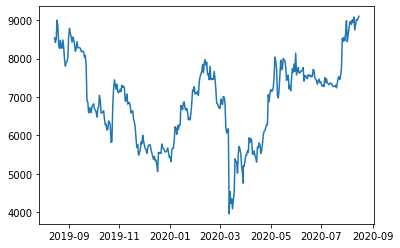

In [ ]:
from pandas_datareader import data as web
import datetime 
stock = 'BTC-GBP'

start_date = (datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%m-%d-%Y")       
df = web.DataReader(stock, data_source='yahoo', start=start_date)


import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [ ]:
import pandas_datareader as pdr
import datetime 
df = pdr.get_data_yahoo('BTC-GBP', 
                          start=datetime.datetime(2020,1,4), 
                          end=datetime.datetime.now())

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-04,5678.214355,5588.101562,5615.517578,5665.424805,1.410059e+10,5665.424805
2020-01-05,5768.627930,5658.553223,5665.268066,5666.796875,1.508207e+10,5666.796875
2020-01-06,5908.118164,5625.253906,5666.135254,5898.515625,1.767171e+10,5898.515625
2020-01-07,6236.903809,5924.236816,5898.107422,6225.827637,2.193863e+10,6225.827637
2020-01-08,6407.449707,6071.718750,6224.487793,6165.646484,2.416895e+10,6165.646484
...,...,...,...,...,...,...
2020-08-10,9119.550781,8576.461914,9086.573242,8742.436523,2.071715e+10,8742.436523
2020-08-11,8998.649414,8625.061523,8737.894531,8880.038086,1.921238e+10,8880.038086
2020-08-12,9026.142578,8573.526367,8882.698242,9016.762695,2.105891e+10,9016.762695


# Connect with Luno account (using Luno API)

In [ ]:
from luno_python.client import Client
c = Client(api_key_id='dfqpu5an2kh7q', api_key_secret='UWjQZBJxoNEOKL1id59VaFBSBORvuAdeR2ZHA6_vdso')
try:
  ticker = c.get_ticker(pair='XBTGBP')
  print(ticker)
except Exception as e:
  print(e)

ticker['last_trade']

{'pair': 'XBTGBP', 'timestamp': 1597531006313, 'bid': '9109.58', 'ask': '9128.91', 'last_trade': '9150.00', 'rolling_24_hour_volume': '1.5085', 'status': 'ACTIVE'}


'9150.00'

## Get market depth



In [ ]:
res = c.get_order_book(pair='XBTGBP')
res


{'asks': [{'price': '9128.91', 'volume': '1.6196'},
  {'price': '9133.63', 'volume': '0.8302'},
  {'price': '9134.23', 'volume': '1.9926'},
  {'price': '9260.00', 'volume': '0.54'},
  {'price': '9310.00', 'volume': '0.0113'},
  {'price': '9500.00', 'volume': '0.0023'},
  {'price': '15000.00', 'volume': '0.0737'}],
 'bids': [{'price': '9109.58', 'volume': '0.8743'},
  {'price': '8650.01', 'volume': '0.109'},
  {'price': '8650.00', 'volume': '0.0512'},
  {'price': '8502.00', 'volume': '0.0235'},
  {'price': '8500.00', 'volume': '0.0754'},
  {'price': '7700.01', 'volume': '0.0439'},
  {'price': '7700.00', 'volume': '0.0029'},
  {'price': '7550.00', 'volume': '0.0266'},
  {'price': '7300.00', 'volume': '0.0142'},
  {'price': '7200.00', 'volume': '0.0073'},
  {'price': '7102.00', 'volume': '0.0899'},
  {'price': '7089.00', 'volume': '0.0113'},
  {'price': '6500.01', 'volume': '0.0015'}],
 'timestamp': 1597531006786}

# Functions (enter trades)

In [ ]:
balance = c.get_balances(assets=['XBT','GBP'])
balBTC = balance['balance'][0]['balance']
balGBP = balance['balance'][1]['balance']
balGBP

'15.636743'

In [ ]:
enter_trade = True

In [ ]:
pair = 'XBTBGP'

price = ticker['last_trade']

# This function places a market order in the direction BuySell, "B" = Buy, "S" = Sell, uses symbol, amount, stop, limit
def enter(BuySell):
    global enter_trade

    if BuySell == 'B':
      '''
      if enter_trade == True:
          print("Havent close previous position")
      else:
      '''
      try:
          #c.post_market_order(pair='XBTGBP', type='SELL', base_volume='0.0023')
          if (price == float(res['asks'][0]['price'])):
              c.post_market_order(pair='XBTGBP', type='BUY', counter_volume='21')
              print("Buy Successfully at price: ", res['asks'][0]['price'])
              enter_trade = True
          else:
              c.post_limit_order(pair='XBTGBP', type='BID', volume='0.0023', price = str(float(price)))
              print("Post limit order, buy at price: ", price)
              enter_trade = True

      except Exception as e:
          print(e)
          enter_trade = False

    if BuySell == 'S':
      '''
      if enter_trade == False:
          print("Havent entered the market, all positions are closed")
      else:
      '''
      try:
          #c.post_market_order(pair='XBTGBP', type='BUY', counter_volume='10')
          if (price == float(res['bids'][0]['price'])):
              c.post_market_order(pair='XBTGBP', type='SELL', base_volume='0.0023')
              print("Sell Successfully at price.", res['bids'][0]['price'])
              enter_trade = False
          else:
              c.post_limit_order(pair='XBTGBP', type='ASK', volume='0.0023', price = str(float(price)))
              print("Post limit order, sell at price.", price)
              enter_trade = False
      except Exception as e:
        print(e)
        enter_trade = True

# RSI logic (set up and install)

In [ ]:
!pip install tulipy
import tulipy as ti

rsiPeriod = 14
upper_rsi = 70.0
lower_rsi = 30.0

     |████████████████████████████████| 112kB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tulipy: filename=tulipy-0.4.0-cp36-cp36m-linux_x86_64.whl size=227046 sha256=360b0b536a632a056cd33df4216f4cd126fd30ef0e0971b8f85dcb522a6d8555
  Stored in directory: /root/.cache/pip/wheels/c7/17/ad/a187769379c3b970acfd4aabe82e8e2b4dfca2b518a26de957
Successfully built tulipy


# Main function that run every 45 minute 
to check the price, RSI line and generate run/buy signal when RSI cross (using the functions above)

In [ ]:
import sched, time
import numpy as np


#Initiate our scheduler so we can keep checking every minute for new price changes
s = sched.scheduler(time.time, time.sleep)

# This function is run every 5 minutes

def run(sc): 

    #Get prices from Luno, retrieve prices data
    res = c.get_order_book(pair='XBTGBP')
    closePrices = c.list_trades(pair='XBTGBP')
    pricedata = []

    for x in range(0,len(closePrices['trades'])):
        pricedata.append(float(closePrices['trades'][x]['price']))
    DATA = np.array(pricedata)

    askdata = []
    for x in range(0,len(res['asks'])):
        askdata.append(float(res['asks'][x]['price']))
    DATAA = np.array(askdata)

    biddata = []
    for x in range(0,len(res['bids'])):
        biddata.append(float(res['bids'][x]['price']))
    DATAB = np.array(biddata)

    #Calculate Indicators

    BB = ti.bbands(DATA, period=20, stddev=2)
    BB1 = ti.bbands(DATA, period=20, stddev=1)
    MA = ti.sma(DATA, period=5)
    MAA = ti.sma(DATAA, period=3)
    MAB = ti.sma(DATAB, period=5)

    # TRADING LOGIC
    current_price = pricedata[0]
    
    '''
    # Trading logic based on Moving Average line
    if (MAB[0] < current_price < MA[0]) or (current_price <BB[0][0]):
        print("Buying, price is low!")
        enter("B")
   
    if (MA[0] < current_price < MAA[0]) or (current_price > BB[2][0]):
        print("Selling, price is high!")
        enter("S")
    '''
    #Trading logic based on Bollinger Band line
    if (BB[1][0] > current_price > BB1[0][0]):
        print("Buying, price is low!")
        enter("B")

    if (BB[1][0] < current_price < BB1[2][0]):
        print("Selling, price is high!")
        enter("S")
    
    if (BB1[0][0] > current_price > BB[0][0]):
        print("Price might go down, sell to cut lost")
        enter("S")

    if (BB1[2][0] < current_price < BB[2][0]):
        print("Price might go up, buy now")
        enter("B")


    print("Current price: ", pricedata[0]) 
    
    print("MA bid(low): ", MAB[0])
    print("MA middle: ", MA[0])
    print("MA ask(high): ", MAA[0])

    print("-------------")

    print("BBand upper ", BB[2][0])
    print("BBand up: ", BB1[2][0])
    print("BBand middle: ", BB[1][0])
    print("BBand low: ", BB1[0][0])
    print("BBand lower: ", BB[0][0])

   

  
    print("                               Bot working, checking...")

    #call this method again every 45 minutes for new price changes
    s.enter(2500, 1, run, (sc,))
    
s.enter(1, 1, run, (s,))

s.run()

Selling, price is high!
Post limit order, sell at price. 9150.00
Current price:  9150.0
MA bid(low):  8680.998
MA middle:  9085.490000000002
MA ask(high):  9171.676666666666
-------------
BBand upper  9259.381649828723
BBand up:  9160.949824914363
BBand middle:  9062.518000000002
BBand low:  8964.08617508564
BBand lower:  8865.65435017128
                               Bot working, checking...
